# Phân tích dữ liệu thực tế

## 1. Bitly Data from 1.USA.gov

In [2]:

from numpy.random import randn
import numpy as np
np.random.seed(123)
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.rc("figure", figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80

In [3]:
path = "datasets/bitly_usagov/example.txt"

In [4]:
import json

path = "datasets/bitly_usagov/example.txt"

# Đọc dữ liệu
with open(path) as f:
    records = [json.loads(line) for line in f]

# In 5 bản ghi đầu tiên
for i, rec in enumerate(records[:5], 1):
    print(f"Record {i}: {rec}")


Record 1: {'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11', 'c': 'US', 'nk': 1, 'tz': 'America/New_York', 'gr': 'MA', 'g': 'A6qOVH', 'h': 'wfLQtf', 'l': 'orofrog', 'al': 'en-US,en;q=0.8', 'hh': '1.usa.gov', 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf', 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991', 't': 1331923247, 'hc': 1331822918, 'cy': 'Danvers', 'll': [42.576698, -70.954903]}
Record 2: {'a': 'GoogleMaps/RochesterNY', 'c': 'US', 'nk': 0, 'tz': 'America/Denver', 'gr': 'UT', 'g': 'mwszkS', 'h': 'mwszkS', 'l': 'bitly', 'hh': 'j.mp', 'r': 'http://www.AwareMap.com/', 'u': 'http://www.monroecounty.gov/etc/911/rss.php', 't': 1331923249, 'hc': 1308262393, 'cy': 'Provo', 'll': [40.218102, -111.613297]}
Record 3: {'a': 'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; .NET4.0C; .NET4.0E; InfoPath.3)

In [5]:
import json
with open(path) as f:
    records = [json.loads(line) for line in f]

In [ ]:
time_zones = [rec["tz"] for rec in records]

##### Lấy các dòng có tz

In [56]:
time_zones = [rec["tz"] for rec in records if "tz" in rec]

In [57]:
time_zones = [rec["tz"] for rec in records if "tz" in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [58]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [59]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [60]:
counts = get_counts(time_zones)
counts["America/New_York"]
len(time_zones)

3440

In [61]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [62]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [63]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

<Axes: ylabel='tz'>

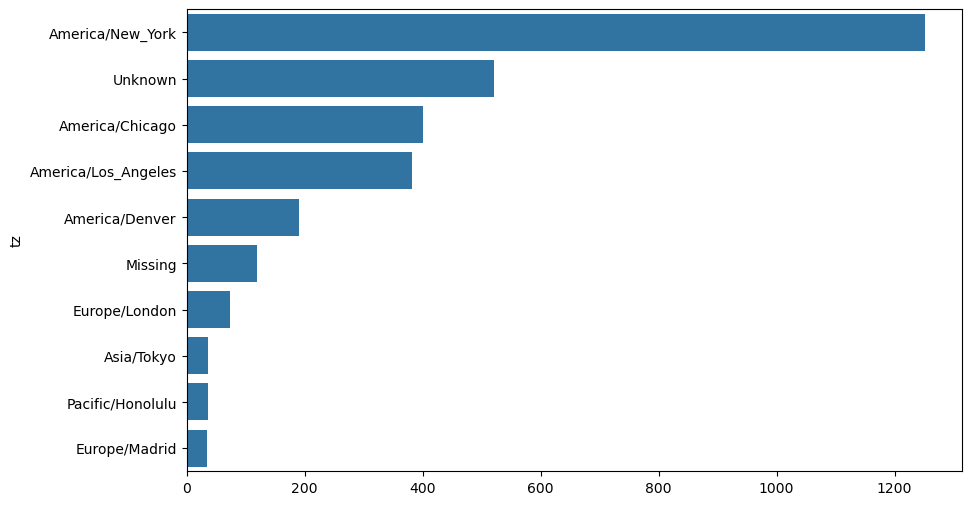

In [65]:
import seaborn as sns
subset = tz_counts.head(10)
sns.barplot(y=subset.index, x=subset.to_numpy())

In [49]:
frame = pd.DataFrame(records)

In [50]:
frame.info()
frame["tz"].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
Name: tz, dtype: object

In [51]:
tz_counts = frame["tz"].value_counts()
tz_counts.head()

tz
America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

In [52]:
clean_tz = frame["tz"].fillna("Missing")
clean_tz[clean_tz == ""] = "Unknown"
tz_counts = clean_tz.value_counts()
tz_counts.head()

tz
America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

In [53]:
plt.figure(figsize=(10, 4))

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Axes: ylabel='tz'>

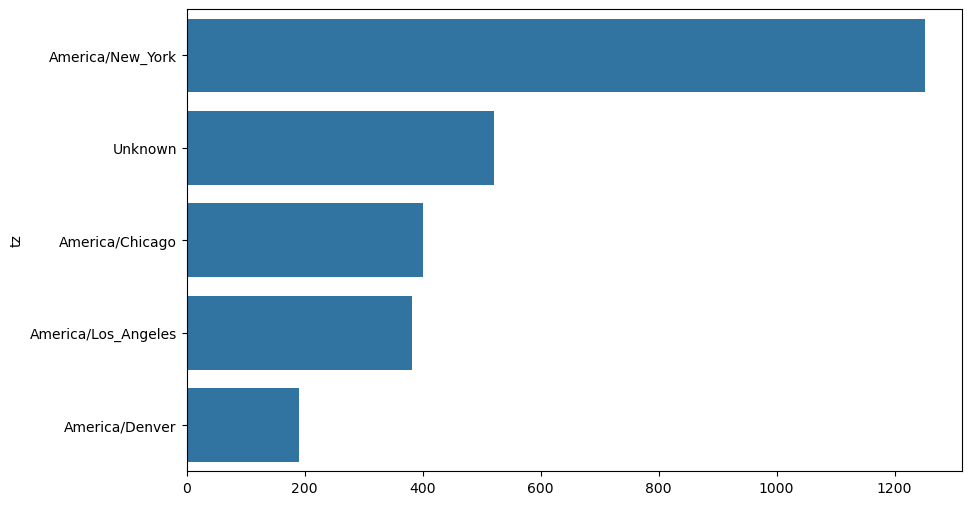

In [54]:
import seaborn as sns
subset = tz_counts.head()
sns.barplot(y=subset.index, x=subset.to_numpy())

In [21]:
frame["a"][1]
frame["a"][50]
frame["a"][51][:50]  # long line

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [22]:
results = pd.Series([x.split()[0] for x in frame["a"].dropna()])
results.head(5)
results.value_counts().head(8)

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
Name: count, dtype: int64

In [23]:
cframe = frame[frame["a"].notna()].copy()

In [24]:
cframe["os"] = np.where(cframe["a"].str.contains("Windows"),
                        "Windows", "Not Windows")
cframe["os"].head(5)

0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [25]:
by_tz_os = cframe.groupby(["tz", "os"])

In [26]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts.head()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


In [27]:
indexer = agg_counts.sum("columns").argsort()
indexer.values[:10]

array([ 2,  7,  5,  4, 14, 11,  9,  8, 24, 26])

In [28]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [29]:
agg_counts.sum(axis="columns").nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [30]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='total', ylabel='tz'>

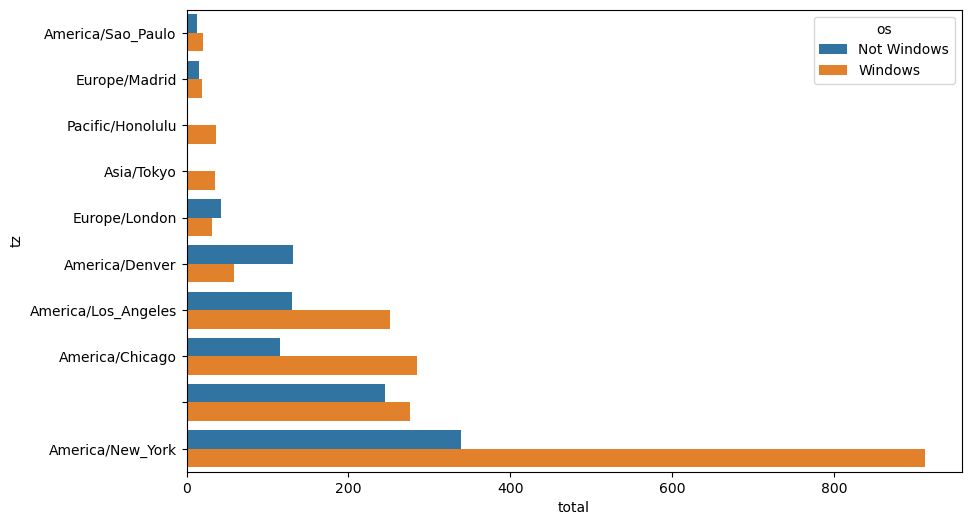

In [31]:
count_subset = count_subset.stack()
count_subset.name = "total"
count_subset = count_subset.reset_index()
count_subset.head(10)
sns.barplot(x="total", y="tz", hue="os",  data=count_subset)

In [32]:
def norm_total(group):
    group["normed_total"] = group["total"] / group["total"].sum()
    return group

results = count_subset.groupby("tz").apply(norm_total)

C:\Users\HP\AppData\Local\Temp\ipykernel_18536\1595230757.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = count_subset.groupby("tz").apply(norm_total)


In [33]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='normed_total', ylabel='tz'>

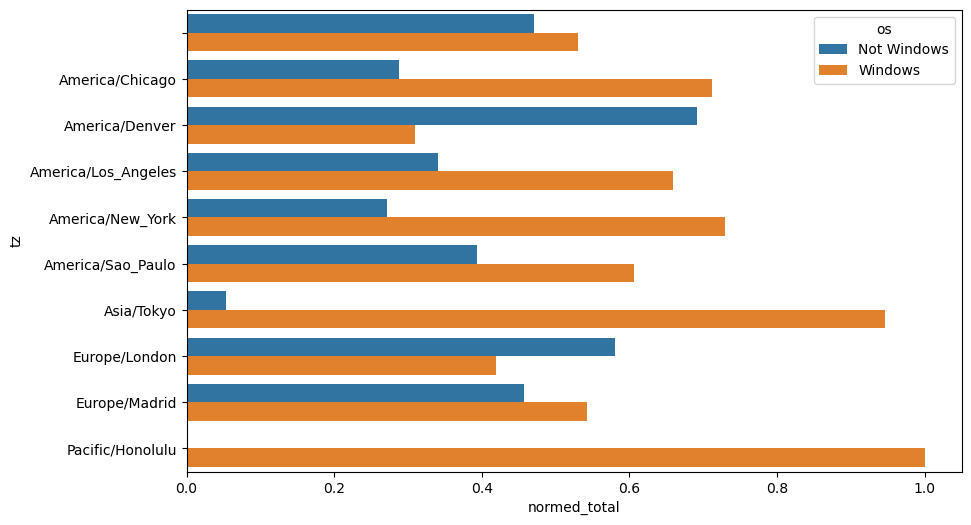

In [34]:
sns.barplot(x="normed_total", y="tz", hue="os",  data=results)

In [35]:
g = count_subset.groupby("tz")
results2 = count_subset["total"] / g["total"].transform("sum")

## 2. MovieLens 1M Dataset

In [3]:
import pandas as pd

unames = ["user_id", "gender", "age", "occupation", "zip"]
users = pd.read_table("datasets/movielens/users.dat", sep="::",
                      header=None, names=unames, engine="python")

rnames = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_table("datasets/movielens/ratings.dat", sep="::",
                        header=None, names=rnames, engine="python")

mnames = ["movie_id", "title", "genres"]
movies = pd.read_table("datasets/movielens/movies.dat", sep="::",
                       header=None, names=mnames, engine="python")

In [4]:
users.head(5)
ratings.head(5)
movies.head(5)
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [5]:
data = pd.merge(pd.merge(ratings, users), movies)
data
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [6]:
mean_ratings = data.pivot_table("rating", index="title",
                                columns="gender", aggfunc="mean")
mean_ratings.head(5)

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [7]:
ratings_by_title = data.groupby("title").size()
ratings_by_title.head()
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [25]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M,rating_count
title,,,
"'burbs, The (1989)",2.793478,2.962085,303
10 Things I Hate About You (1999),3.646552,3.311966,700
101 Dalmatians (1961),3.791444,3.500000,565
101 Dalmatians (1996),3.240000,2.911215,364
12 Angry Men (1957),4.184397,4.328421,616
...,...,...,...
Young Guns (1988),3.371795,3.425620,562
Young Guns II (1990),2.934783,2.904025,369
Young Sherlock Holmes (1985),3.514706,3.363344,379


In [26]:
mean_ratings = mean_ratings.rename(index={"Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)":
                           "Seven Samurai (Shichinin no samurai) (1954)"})

In [27]:
top_female_ratings = mean_ratings.sort_values("F", ascending=False)
top_female_ratings.head(10)

gender,F,M,rating_count
title,,,
"Close Shave, A (1995)",4.644444,4.473795,657
"Wrong Trousers, The (1993)",4.588235,4.478261,882
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589,470
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075,438
Schindler's List (1993),4.562602,4.491415,2304
"Shawshank Redemption, The (1994)",4.539075,4.560625,2227
"Grand Day Out, A (1992)",4.537879,4.293255,473
To Kill a Mockingbird (1962),4.536667,4.372611,928
Creature Comforts (1990),4.513889,4.272277,274


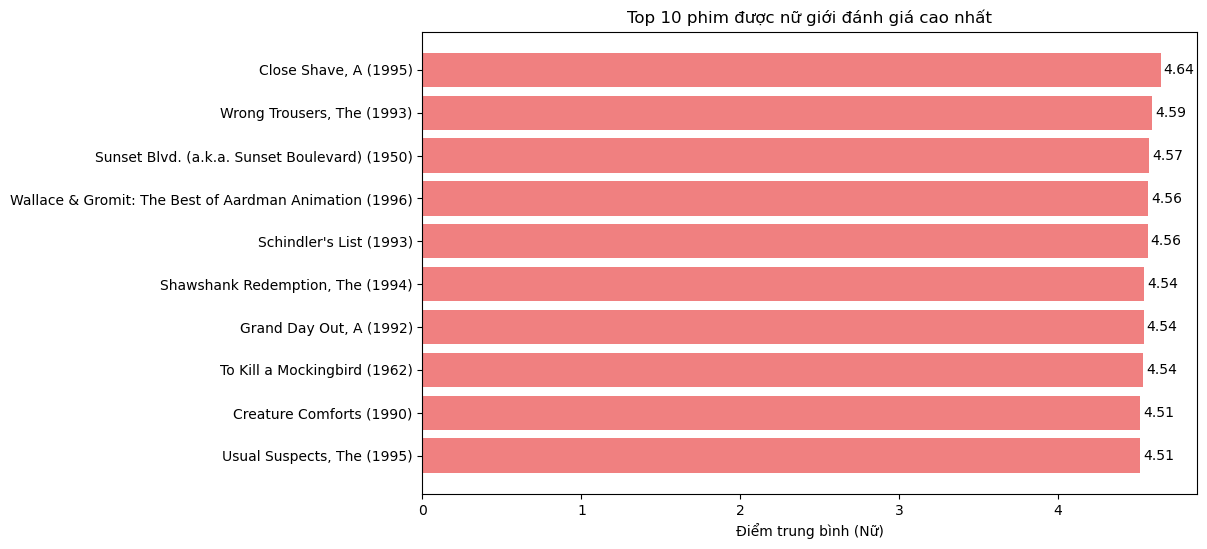

In [29]:
top_female_ratings = mean_ratings.sort_values("F", ascending=False).head(10)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_female_ratings.index, top_female_ratings["F"], color="lightcoral")
plt.xlabel("Điểm trung bình (Nữ)")
plt.title("Top 10 phim được nữ giới đánh giá cao nhất")
plt.gca().invert_yaxis()

# hiển thị giá trị điểm
for bar in bars:
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.2f}", va="center")

plt.show()


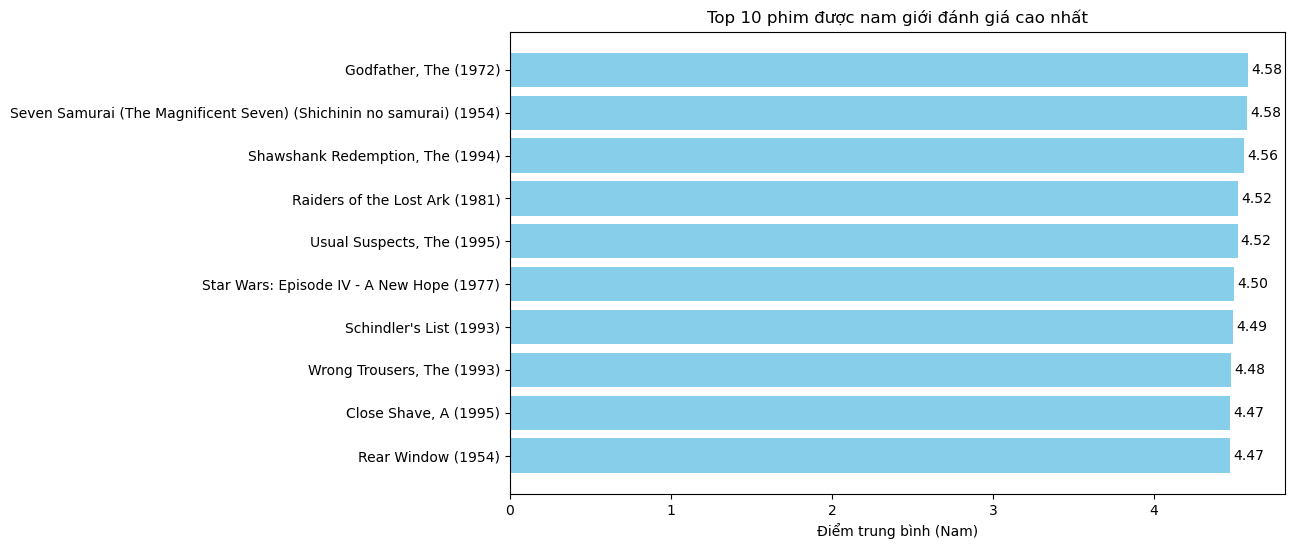

In [9]:
# Lấy top 10 phim được nam giới đánh giá cao nhất
top_male_ratings = mean_ratings.sort_values("M", ascending=False).head(10)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
bars = plt.barh(top_male_ratings.index, top_male_ratings["M"], color="skyblue")
plt.xlabel("Điểm trung bình (Nam)")
plt.title("Top 10 phim được nam giới đánh giá cao nhất")
plt.gca().invert_yaxis()

# Hiển thị giá trị điểm ngay trên thanh
for bar in bars:
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.2f}", va="center")

plt.show()


In [30]:
mean_ratings["diff"] = mean_ratings["M"] - mean_ratings["F"]

In [33]:
sorted_by_diff = mean_ratings.sort_values("diff")
sorted_by_diff.head(10)

gender,F,M,rating_count,diff
title,,,,
Dirty Dancing (1987),3.790378,2.959596,687,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,374,-0.676359
Grease (1978),3.975265,3.367041,817,-0.608224
Little Women (1994),3.870588,3.321739,285,-0.548849
Steel Magnolias (1989),3.901734,3.365957,408,-0.535777
Anastasia (1997),3.800000,3.281609,304,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,1233,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,450,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,295,-0.487561


In [34]:
sorted_by_diff[::-1].head(10)

gender,F,M,rating_count,diff
title,,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,822,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,305,0.676359
Dumb & Dumber (1994),2.697987,3.336595,660,0.638608
"Longest Day, The (1962)",3.411765,4.031447,352,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,385,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,548,0.611985
"Hidden, The (1987)",3.137931,3.745098,284,0.607167
Rocky III (1982),2.361702,2.943503,401,0.581801
Caddyshack (1980),3.396135,3.969737,967,0.573602


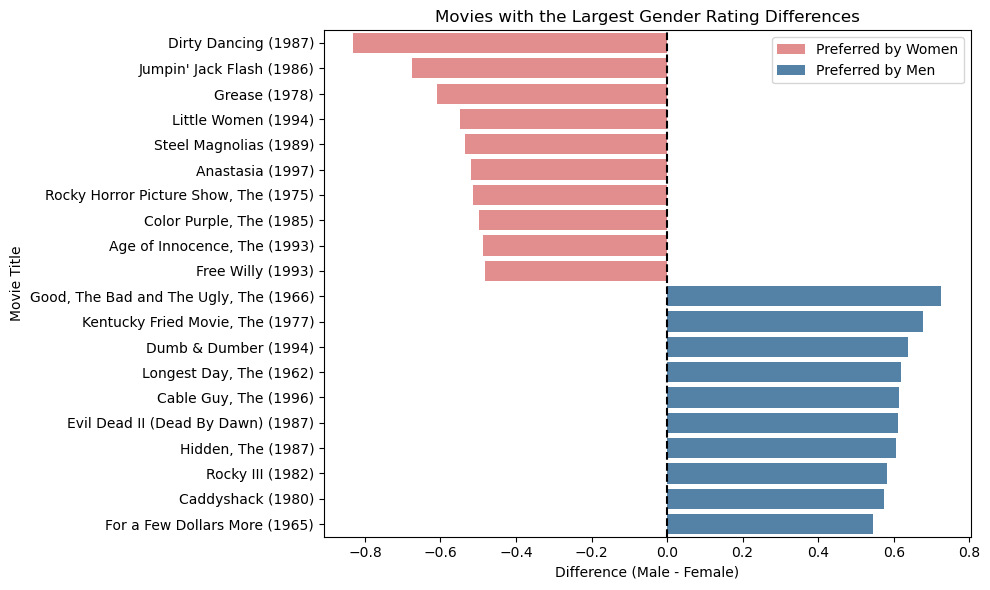

In [7]:
# Tính chênh lệch diff = M - F
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

# Top 10 phim nữ thích hơn (diff âm) và nam thích hơn (diff dương)
top_female_diff = mean_ratings.sort_values('diff').head(10).reset_index()
top_male_diff = mean_ratings.sort_values('diff', ascending=False).head(10).reset_index()

# Vẽ biểu đồ đối xứng
plt.figure(figsize=(10,6))
sns.barplot(data=top_female_diff, x='diff', y='title', color='lightcoral', label='Preferred by Women')
sns.barplot(data=top_male_diff, x='diff', y='title', color='steelblue', label='Preferred by Men')

plt.axvline(0, color='black', linestyle='--')
plt.xlabel('Difference (Male - Female)')
plt.ylabel('Movie Title')
plt.title('Movies with the Largest Gender Rating Differences')
plt.legend()
plt.tight_layout()
plt.show()


In [14]:
rating_std_by_title = data.groupby("title")["rating"].std()
rating_std_by_title = rating_std_by_title.loc[active_titles]
rating_std_by_title.head()

title
'burbs, The (1989)                   1.107760
10 Things I Hate About You (1999)    0.989815
101 Dalmatians (1961)                0.982103
101 Dalmatians (1996)                1.098717
12 Angry Men (1957)                  0.812731
Name: rating, dtype: float64

In [15]:
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_24560\2356224752.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_controversial, x='rating', y='title', palette='coolwarm')


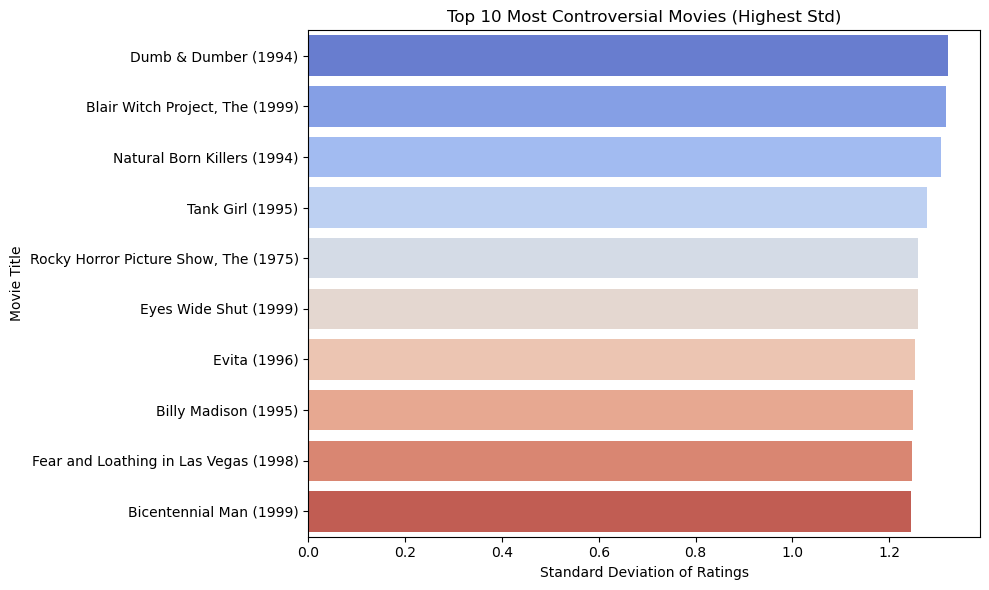

In [8]:
# Tính độ lệch chuẩn (std) theo phim
rating_std_by_title = data.groupby('title')['rating'].std()
rating_std_by_title = rating_std_by_title.loc[active_titles]

# Top 10 phim có std cao nhất
most_controversial = rating_std_by_title.sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=most_controversial, x='rating', y='title', palette='coolwarm')
plt.xlabel('Standard Deviation of Ratings')
plt.ylabel('Movie Title')
plt.title('Top 10 Most Controversial Movies (Highest Std)')
plt.tight_layout()
plt.show()


In [16]:
movies["genres"].head()
movies["genres"].head().str.split("|")
movies["genre"] = movies.pop("genres").str.split("|")
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [17]:
movies_exploded = movies.explode("genre")
movies_exploded[:10]

,movie_id,title,genre
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children's
0,1,Toy Story (1995),Comedy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children's
1,2,Jumanji (1995),Fantasy
2,3,Grumpier Old Men (1995),Comedy
2,3,Grumpier Old Men (1995),Romance
3,4,Waiting to Exhale (1995),Comedy
3,4,Waiting to Exhale (1995),Drama


In [18]:
ratings_with_genre = pd.merge(pd.merge(movies_exploded, ratings), users)
ratings_with_genre.iloc[0]
genre_ratings = (ratings_with_genre.groupby(["genre", "age"])
                 ["rating"].mean()
                 .unstack("age"))
genre_ratings[:10]

age,1,18,25,35,45,50,56
genre,,,,,,,
Action,3.506385,3.447097,3.453358,3.538107,3.528543,3.611333,3.610709
Adventure,3.449975,3.408525,3.443163,3.515291,3.528963,3.628163,3.649064
Animation,3.476113,3.624014,3.701228,3.740545,3.734856,3.780020,3.756233
Children's,3.241642,3.294257,3.426873,3.518423,3.527593,3.556555,3.621822
Comedy,3.497491,3.460417,3.490385,3.561984,3.591789,3.646868,3.650949
Crime,3.710170,3.668054,3.680321,3.733736,3.750661,3.810688,3.832549
Documentary,3.730769,3.865865,3.946690,3.953747,3.966521,3.908108,3.961538
Drama,3.794735,3.721930,3.726428,3.782512,3.784356,3.878415,3.933465
Fantasy,3.317647,3.353778,3.452484,3.482301,3.532468,3.581570,3.532700


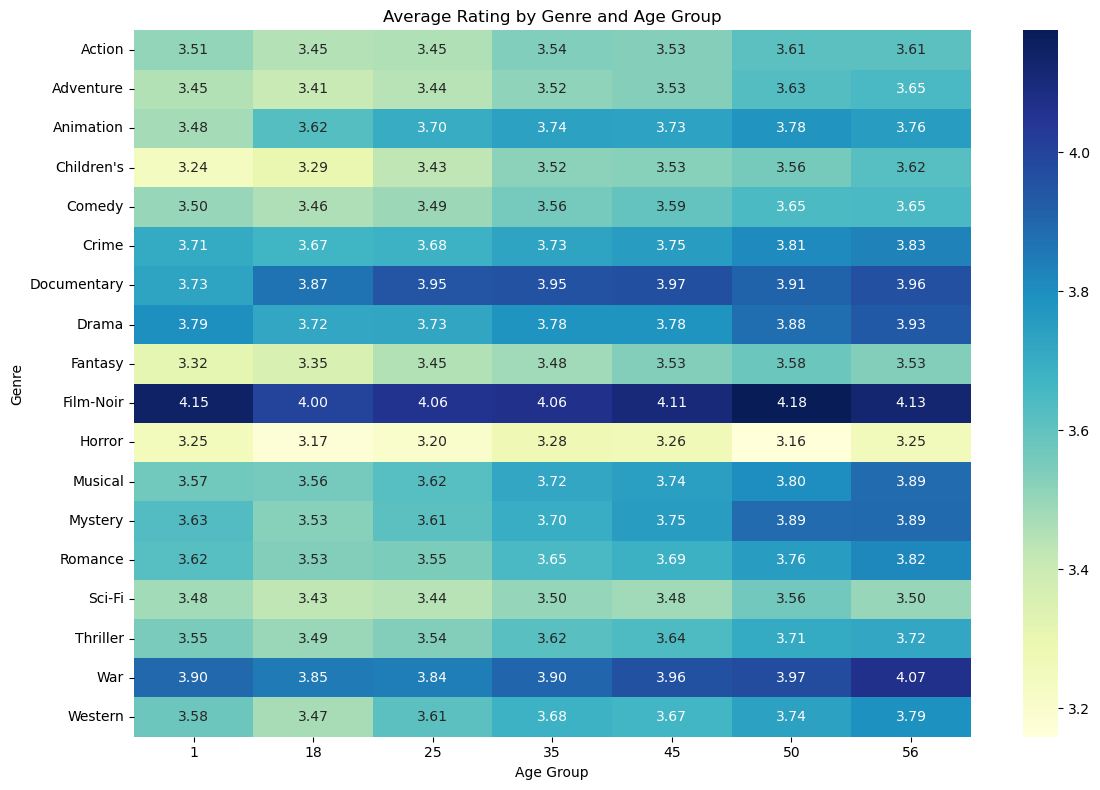

In [10]:
# Xử lý dữ liệu thể loại
movies['genre'] = movies['genres'].str.split('|')
movies_exploded = movies.explode('genre')

# Kết hợp với ratings + users
ratings_with_genre = pd.merge(pd.merge(movies_exploded, ratings), users)

# Tính điểm trung bình cho từng cặp (thể loại, tuổi)
genre_ratings = (ratings_with_genre.groupby(['genre', 'age'])['rating']
                 .mean().unstack('age'))

plt.figure(figsize=(12,8))
sns.heatmap(genre_ratings, cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('Average Rating by Genre and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


## 3. US Baby Names 1880–2010

Import thư viện và nạp dữ liệu

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
names1880 = pd.read_csv("datasets/babynames/yob1880.txt",
                        names=["name", "sex", "births"])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


**Nhận xét**

Tải và xem sơ bộ dữ liệu gốc năm 1880

Dữ liệu có 3 cột chính:

    name: Tên của trẻ em được ghi nhận.

    sex: Giới tính của đứa trẻ là "M" (nam) hoặc "F" (nữ).

    births: Số lượng trẻ sinh ra có tên đó.

Tổng hợp số lượng sinh theo giới tính

In [2]:
names1880.groupby("sex")["births"].sum()

sex
F     90993
M    110493
Name: births, dtype: int64

**Nhận xét**

Giúp biết tổng số bé trai và bé gái sinh trong năm 1880.

Hợp nhất dữ liệu từ 1880 đến 2010

In [3]:
pieces = []
for year in range(1880, 2011):
    path = f"datasets/babynames/yob{year}.txt"
    frame = pd.read_csv(path, names=["name", "sex", "births"])

    # Add a column for the year
    frame["year"] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)
display(names)

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


**Nhận xét:**

Đọc dữ liệu tên trẻ em từ năm 1880 đến 2010, thêm cột “year” để ghi lại năm tương ứng


Phân tích tổng số trẻ sơ sinh theo năm và giới tính

C:\Users\Admin\AppData\Local\Temp\ipykernel_3796\1917876311.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_births = names.pivot_table("births", index="year",


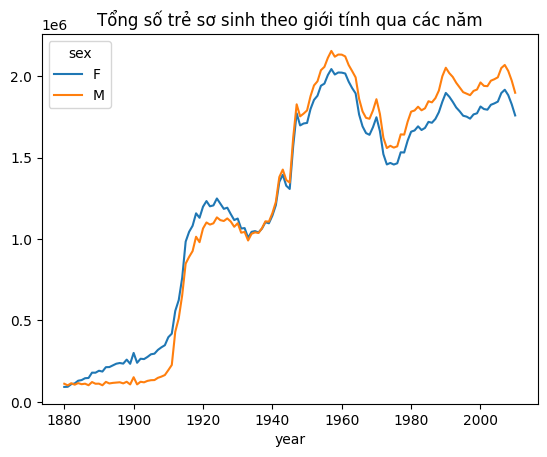

In [4]:
total_births = names.pivot_table("births", index="year",
                                 columns="sex", aggfunc=sum)
total_births.tail()
#total_births.plot(title="Total births by sex and year")
total_births.plot(title="Tổng số trẻ sơ sinh theo giới tính qua các năm")
plt.savefig("images/total_births_chart.pdf")

**Nhận xét:**

Biểu đồ cho thấy số trẻ sinh tăng mạnh dần qua các năm

Trẻ nam (M) luôn nhiều hơn trẻ nữ (F) trong hầu hết các năm.

Khoảng cách giữa hai đường F và M thường khá ổn định, cho thấy xu hướng sinh con trai cao hơn con gái là phổ biến.

Tính tỉ lệ phổ biến của từng tên

In [5]:
def add_prop(group):
    group["prop"] = group["births"] / group["births"].sum()
    return group
names = names.groupby(["year", "sex"], group_keys=False).apply(add_prop)
display(names)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3796\2779158485.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  names = names.groupby(["year", "sex"], group_keys=False).apply(add_prop)


,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


**Nhận xét:**

Thêm cột prop để biểu thị tỉ lệ trẻ mang mỗi tên trong tổng số trẻ sinh cùng năm và giới tính.

Điều này giúp so sánh mức độ phổ biến của các tên theo thời gian, thay vì chỉ dựa vào số lượng tuyệt đối.

Kiểm tra tổng tỉ lệ (prop) theo năm và giới tính

In [6]:
names.groupby(["year", "sex"])["prop"].sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

**Nhận xét:**

Kiểm tra xem tổng tỉ lệ prop trong mỗi nhóm (năm + giới tính) có bằng 1 hay không.

Lấy 1000 tên phổ biến nhất theo năm và giới tính

In [7]:
def get_top1000(group):
    return group.sort_values("births", ascending=False)[:1000]
grouped = names.groupby(["year", "sex"])
top1000 = grouped.apply(get_top1000)
top1000.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_3796\2738497238.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top1000 = grouped.apply(get_top1000)


name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077643
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

**Nhận xét:**

Sắp xếp các tên trong từng nhóm (năm + giới tính) theo số lượng trẻ sinh (births) giảm dần, rồi lấy 1000 tên phổ biến nhất.

Nhằm phục vụ cho việc phân tích xu hướng tên qua thời gian.

Đặt lại chỉ mục cho bảng Top 1000 tên

In [8]:
top1000 = top1000.reset_index(drop=True)
display(top1000.head())

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


**Nhận xét:**

Nhằm xóa các chỉ mục cũ và tạo lại chỉ mục tuần tự mới giúp dữ liệu gọn gàng, dễ truy cập và trực quan hơn khi hiển thị.

### Analyzing Naming Trends
*Phân tích xu hướng đặt tên*

Tách dữ liệu theo giới tính

In [9]:
boys = top1000[top1000["sex"] == "M"]
girls = top1000[top1000["sex"] == "F"]

**Nhận xét:**

Giúp dễ dàng so sánh xu hướng đặt tên giữa nam và nữ, hoặc phân tích sâu hơn từng giới tính

Kiểm tra thông tin tổng quan của bảng tổng hợp số lượng sinh theo tên và năm

In [10]:
total_births = top1000.pivot_table("births", index="year",
                                   columns="name",
                                   aggfunc=sum)
total_births.info()

C:\Users\Admin\AppData\Local\Temp\ipykernel_3796\1565621143.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  total_births = top1000.pivot_table("births", index="year",


<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


Vẽ biểu đồ xu hướng của một số tên tiêu biểu

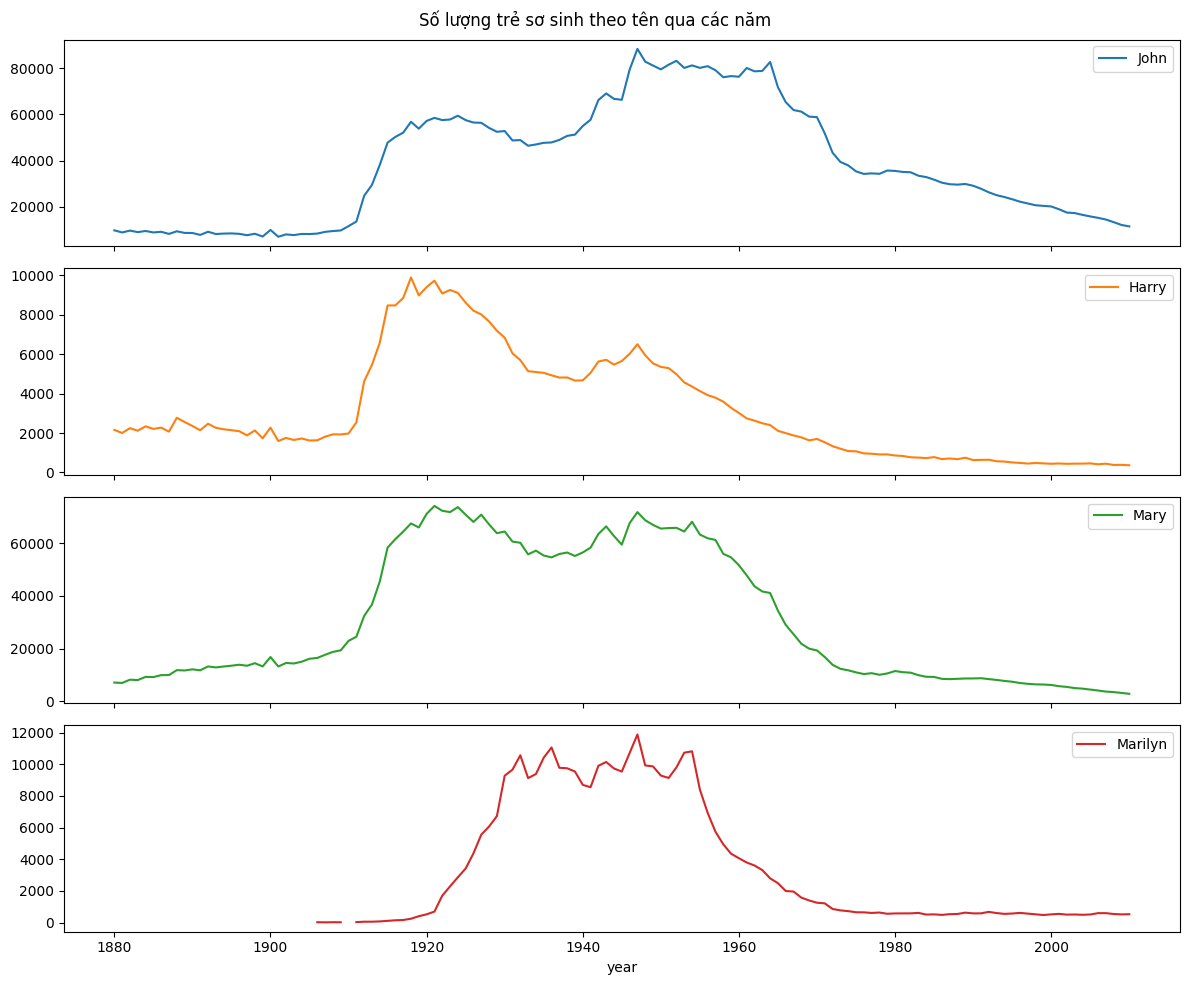

In [13]:
subset = total_births[["John", "Harry", "Mary", "Marilyn"]]
#subset.plot(subplots=True, figsize=(12, 10),
#           title="Number of births per year")
subset = subset.plot(subplots=True, figsize=(12, 10),
                 title="Số lượng trẻ sơ sinh theo tên qua các năm")
plt.tight_layout()
plt.savefig("images/so_luong_tre_theo_ten.pdf")

**Nhận xét:**

Biểu đồ này minh họa mức độ phổ biến của các tên John, Harry, Mary, Marilyn qua thời gian.

John: Xuất hiện ổn định từ 1880s, đạt đỉnh khoảng 1940–1950 với hơn 80.000 trẻ được đặt tên John mỗi năm. Sau 1960, độ phổ biến giảm dần nhưng vẫn là một trong những tên phổ biến 

Harry: Tăng nhanh vào khoảng 1910–1920, đạt đỉnh gần 10.000 trẻ/năm. Sau đó giảm dần, đặc biệt sau 1950.

Mary: Là tên nữ phổ biến nhất trong suốt nửa đầu thế kỷ 20, đặc biệt 1910–1950 với hơn 60.000–70.000 trẻ/năm.

Marilyn: Xuất hiện muộn hơn, nổi bật trong thập niên 1930–1950, sau đó giảm mạnh.

#### Measuring the increase in naming diversity
*Đo lường mức độ đa dạng của tên theo thời gian*

Tổng tỉ lệ phần trăm trong top 1000 tên theo giới tính qua từng năm

C:\Users\Admin\AppData\Local\Temp\ipykernel_3796\514513397.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table = top1000.pivot_table("prop", index="year",


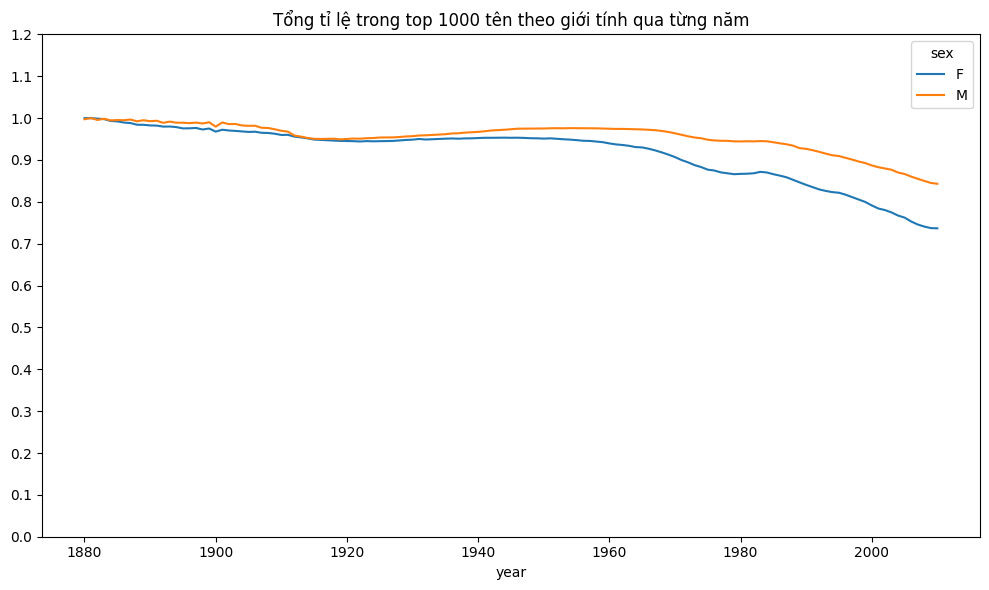

In [15]:
table = top1000.pivot_table("prop", index="year",
                            columns="sex", aggfunc=sum)
#table.plot(title="Sum of table1000.prop by year and sex",
#           yticks=np.linspace(0, 1.2, 13))
table.plot(title="Tổng tỉ lệ trong top 1000 tên theo giới tính qua từng năm",
           yticks=np.linspace(0, 1.2, 13),
           figsize=(10,6))
plt.tight_layout()
plt.savefig("images/tong_ty_le_top1000.pdf")

**Nhận xét:**

Giai đoạn đầu (1880–1940), tổng tỉ lệ của top 1000 tên gần bằng 1.0. Hầu như tất cả trẻ em đều mang tên nằm trong nhóm phổ biến nhất.

Sau năm 1950, đặc biệt là từ 1980 trở đi, đường biểu diễn giảm dần, rõ rệt hơn ở giới nữ (F).

Điều này cho thấy xu hướng đa dạng hóa tên: ngày càng nhiều tên mới được đặt cho trẻ, khiến 1000 tên phổ biến nhất chiếm tỷ lệ nhỏ hơn tổng số trẻ sinh ra.

Lọc dữ liệu tên bé trai năm 2010

In [16]:
df = boys[boys["year"] == 2010]
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


**Nhận xét:**

Dùng để phân tích top 10 tên bé trai năm 2010.

Tính tích lũy tỉ lệ phần trăm của các tên bé trai năm 2010

In [20]:
prop_cumsum = df["prop"].sort_values(ascending=False).cumsum()
prop_cumsum[:10].apply(lambda x: f"{x*100:.2f}%")

260877    1.15%
260878    2.09%
260879    3.00%
260880    3.89%
260881    4.78%
260882    5.66%
260883    6.52%
260884    7.34%
260885    8.15%
260886    8.96%
Name: prop, dtype: object

**Nhận xét:**

Tên phổ biến nhất chiếm 1.15% tổng số bé trai năm 2010.

Top 2 tên phổ biến nhất cộng lại chiếm 2.09% tổng số.

Top 3 tên chiếm gần 3.0%.

Top 10 tên phổ biến nhất năm 2010 chỉ chiếm khoảng 9% tổng số trẻ trai, cho thấy các tên khá đa dạng, không tập trung vào vài tên như những năm xưa.

Xác định số lượng tên chiếm 50% tổng số trẻ sinh trong năm 2010

In [21]:
prop_cumsum.searchsorted(0.5)

116

**Nhận xét:**

Cần 117 tên phổ biến nhất để chiếm 50% tổng số trẻ sinh năm 2010.(Vì mảng bắt đầu từ 0)

Điều này cho thấy độ đa dạng tên rất cao, vì phải tới 117 tên mới chiếm nửa dân số bé trai. 

Xác định số lượng tên bé trai năm 1900 chiếm 50% tổng số trẻ sinh

In [22]:
df = boys[boys.year == 1900]
in1900 = df.sort_values("prop", ascending=False).prop.cumsum()
in1900.searchsorted(0.5) + 1

25

**Nhận xét:**

Cần 26 tên phổ biến nhất để chiếm 50% tổng số trẻ sinh năm 1990. 

Chứng tỏ nhiều trẻ được đặt cùng vài tên phổ biến. Mức đa dạng tên thấp hơn so với các năm sau.

Tính độ đa dạng tên theo thời gian (điểm phân vị 50%)

In [24]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values("prop", ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1

diversity = top1000.groupby(["year", "sex"]).apply(get_quantile_count)
diversity = diversity.unstack()

C:\Users\Admin\AppData\Local\Temp\ipykernel_3796\1666708627.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  diversity = top1000.groupby(["year", "sex"]).apply(get_quantile_count)


**Nhận xét:**

Giúp đo lường mức độ đa dạng tên qua các năm — cụ thể là bao nhiêu tên phổ biến nhất chiếm 50% tổng số trẻ sinh.

Giá trị càng cao → tên càng đa dạng.

Giá trị thấp → tập trung vào ít tên phổ biến hơn.

Bảng độ đa dạng tên

In [25]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


**Nhận xét:**

Năm 1880 cần 38 tên nữ và 14 tên nam để đạt 50% tổng số trẻ sinh

Năm 1884 cần 39 tên nữ và 16 tên nam.

Nhìn chung, số lượng tên nữ luôn lớn hơn số tên nam, cho thấy tên nữ đa dạng hơn so với tên nam.

Biểu đồ số lượng tên phổ biến chiếm 50% tổng trẻ sinh

<Figure size 640x480 with 0 Axes>

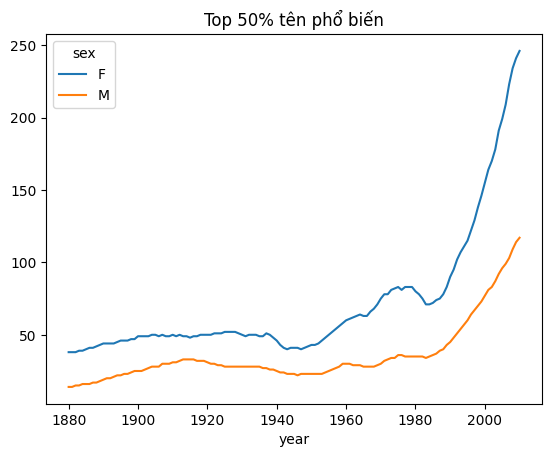

In [30]:
fig = plt.figure()
#diversity.plot(title="Number of popular names in top 50%")
diversity.plot(title="Top 50% tên phổ biến")
plt.savefig("images/top50_ten_pho_bien.pdf", format='pdf')

**Nhận xét:**

Số lượng tên phổ biến của bé gái luôn cao hơn bé trai → Tên nữ đa dạng hơn.

Từ khoảng năm 1940–1960, số lượng tên giữ ổn định, sau đó tăng mạnh, đặc biệt từ 1980 trở đi.

#### The “last letter” revolution
*Cuộc cách mạng chữ cái cuối trong tên*

Ví dụ: “Anna” → “a”, “David” → “d”

Phân tích chữ cái cuối của tên

In [31]:
def get_last_letter(x):
    return x[-1]

last_letters = names["name"].map(get_last_letter)
last_letters.name = "last_letter"

table = names.pivot_table("births", index=last_letters,
                          columns=["sex", "year"], aggfunc=sum)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3796\121524359.py:7: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table = names.pivot_table("births", index=last_letters,


**Nhận xét:**

Nhằm lấy chữ cái cuối của từng tên và tổng hợp số trẻ sinh ra theo chữ cái cuối của giới tính và năm.

Giúp thấy xu hướng chữ cái cuối phổ biến theo giới tính và thay đổi theo thời gian, phục vụ cho phân tích “last letter revolution”.

Hiển thị việc lấy dữ liệu chữ cái cuối cho các năm tiêu biểu

In [32]:
subtable = table.reindex(columns=[1910, 1960, 2010], level="year")
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

**Nhận xét:**

Chữ “a”: cực phổ biến ở nữ (F), số lượng tăng mạnh từ 108k (1910) → 691k (1960) → 670k (2010). Ở nam (M) gần như không phổ biến.

Chữ "d" ở nam (M) giảm từ 262k (1960) → 44k (2010), cho thấy thay đổi xu hướng tên nam. Ở nữ ít dùng.

Tổng số sinh theo chữ cái cuối, giới tính và năm

In [35]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

**Nhận xét:**

Nữ (F): số trẻ tăng mạnh từ 1910 (≈ 0.4 triệu) → 1960 (≈ 2 triệu), sau đó giảm nhẹ 2010 (≈ 1.76 triệu).

Nam (M): số trẻ tăng từ 1910 (≈ 0.19 triệu) → 1960 (≈ 2.13 triệu), rồi giảm nhẹ 2010 (≈ 1.9 triệu).

Chuẩn hóa chữ cái cuối thành tỷ lệ

In [34]:
letter_prop = subtable / subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n            0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o            0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t            0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

**Nhận xét:**

Nữ (F): chữ cái cuối “a”, “e”, “y” chiếm tỷ lệ cao nhất, với “a” tăng dần từ 1910 → 2010, phản ánh xu hướng tên nữ phổ biến.

Nam (M): chữ cái cuối “d”, “n”, “y” phổ biến nhất, với “n” tăng mạnh năm 2010, cho thấy thay đổi xu hướng tên nam theo thời gian.

Biểu đồ cột tỷ lệ chữ cái cuối theo giới tính

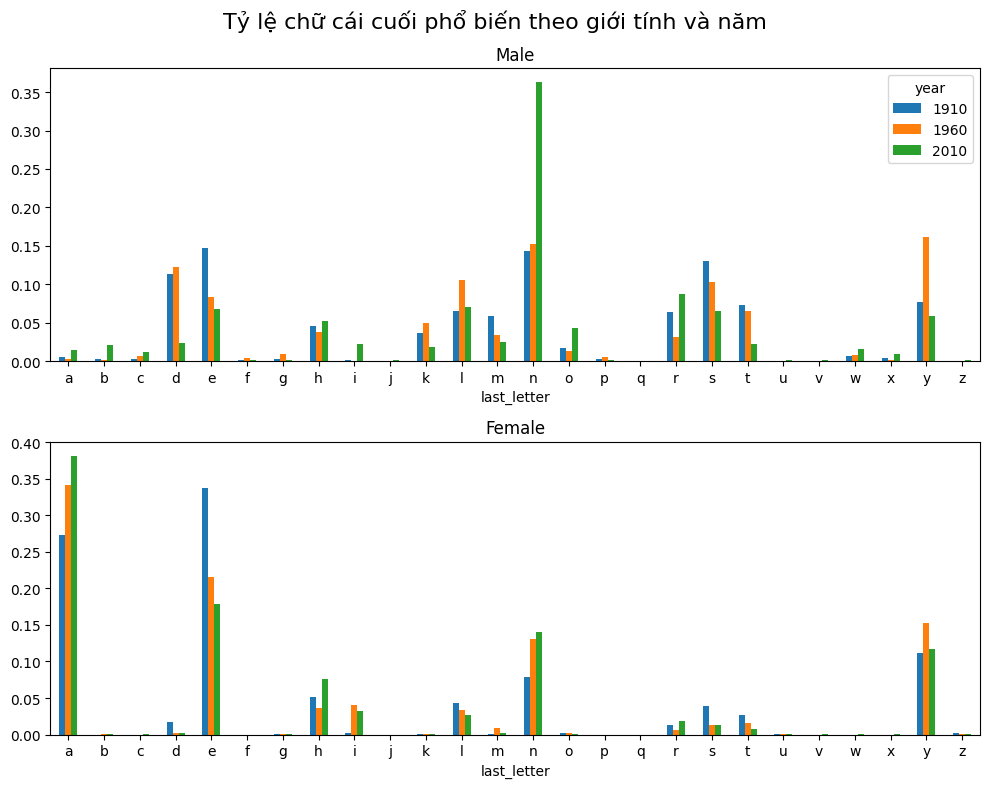

In [37]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop["M"].plot(kind="bar", rot=0, ax=axes[0], title="Male")
letter_prop["F"].plot(kind="bar", rot=0, ax=axes[1], title="Female",
                      legend=False)
fig.suptitle("Tỷ lệ chữ cái cuối phổ biến theo giới tính và năm", fontsize=16)                      
plt.tight_layout() 
plt.savefig("images/last_letter_trend.pdf", format='pdf')

**Nhận xét:**

***Tên nam (M):***

Chữ “n” tăng mạnh từ 14.3% (1910) → 36.3% (2010), trở thành kết thúc phổ biến nhất.

Chữ “d” và “s” giảm mạnh (11.3% → 2.3%, 13.0% → 6.5%).

Chữ “r” tăng nhẹ (6.4% (1910) → 8.7% (2010)), trong khi “l” và “t” giảm dần (10.4% → 7.0%, 6.5% → 2.3%).

Một số chữ hiếm như “o”, “y”, “w” tăng nhẹ trong giai đoạn 1960–2010.

***Tên nữ (F):***

Chữ “a” tăng mạnh từ 27.3% (1910) → 38.1% (2010), trở thành kết thúc phổ biến nhất.

Chữ “e” giảm từ 33.7% (1910) → 17.8% (2010), trong khi “n” tăng từ 7.9% (1910) → 14.0% (2010).

Chữ “y” tăng lên 15.2% (1960) rồi giảm còn 11.6% (2010).

Các chữ “t”, “s”, “l” đều giảm dần qua ba mốc 1910 → 1960 → 2010.

Bảng tỷ lệ các chữ cái cuối của tên nam theo từng năm, tập trung vào ba chữ cái phổ biến nhất: “d”, “n”, và “y”.

In [39]:
letter_prop = table / table.sum()

dny_ts = letter_prop.loc[["d", "n", "y"], "M"].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


**Nhận xét:**

Trong giai đoạn 1880 – 1884, tỷ lệ các tên nam kết thúc bằng chữ “n” luôn cao nhất (khoảng 15%), thể hiện đây là dạng kết thúc phổ biến nhất.

Chữ “d” duy trì quanh mức 8 – 8.6%, ổn định nhẹ qua các năm.

Chữ “y” có xu hướng tăng nhẹ từ 7.6% → 8.0%, cho thấy ngày càng được ưa chuộng hơn trong cách đặt tên nam.

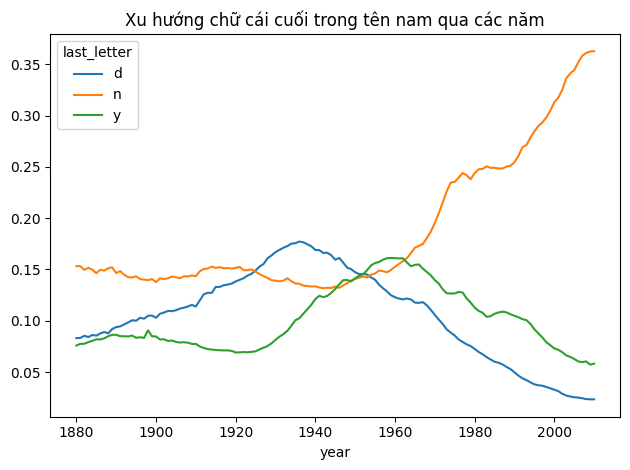

In [46]:
dny_ts.plot(title="Xu hướng chữ cái cuối trong tên nam qua các năm")
plt.tight_layout() 
plt.savefig("images/xuhuongtennam.pdf", format="pdf")

**Nhận xét:**

Tên nam kết thúc bằng “n” tăng mạnh và trở thành xu hướng phổ biến nhất, từ khoảng 15% năm 1880 lên hơn 35% sau năm 2000.

Tên kết thúc bằng “d” phổ biến trong giai đoạn 1910–1950 (đạt đỉnh gần 20%) nhưng sau đó giảm mạnh.

Tên kết thúc bằng “y” tăng nhẹ đến giữa thế kỷ 20 rồi giảm dần sau năm 1960.
→ Xu hướng chung: các tên nam hiện đại có xu hướng ưu tiên kết thúc bằng “n”, trong khi “d” và “y” xuất hiện ít thường xuyên hơn.

#### Boy names that became girl names (and vice versa)
*Phân tích các tên từng phổ biến ở giới nam nhưng sau đó trở nên phổ biến ở giới nữ (và ngược lại)*

Lọc các tên có chứa chuỗi "Lesl" trong danh sách các tên phổ biến (từ top 1000).

In [47]:
all_names = pd.Series(top1000["name"].unique())
lesley_like = all_names[all_names.str.contains("Lesl")]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

**Nhận xét:**

Nhằm xác định các biến thể của tên “Lesl” để phân tích xu hướng giới tính ở bước tiếp theo.

 Chọn các tên liên quan tới chuỗi "Lesl"  và tính tổng số trẻ sinh theo từng tên

In [49]:
filtered = top1000[top1000["name"].isin(lesley_like)]
filtered.groupby("name")["births"].sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

**Nhận xét:**

Tên “Leslie” chiếm đa số tuyệt đối với hơn 370 nghìn lượt đặt, cho thấy đây là biến thể phổ biến nhất trong nhóm.

Các biến thể khác như “Lesley” và “Lesly” có tần suất thấp hơn nhiều, còn “Leslee” và “Lesli” rất hiếm gặp.

Bảng tỷ lệ phần trăm trẻ sinh theo giới tính (F/M) cho các biến thể tên có chứa chuỗi "Lesl"

In [50]:
table = filtered.pivot_table("births", index="year",
                             columns="sex", aggfunc="sum")
table = table.div(table.sum(axis="columns"), axis="index")
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


**Nhận xét:**

Trong các năm 2006 – 2010, tất cả trẻ mang tên trong danh sách đều là nữ. Các tên này gần đây chỉ dùng cho nữ, không còn xuất hiện ở nam.

Cột nam (M) = NaN vì không có trẻ nam nào mang các tên này trong các năm đó.

 Biểu đồ tỷ lệ trẻ sinh theo giới tính

<Figure size 640x480 with 0 Axes>

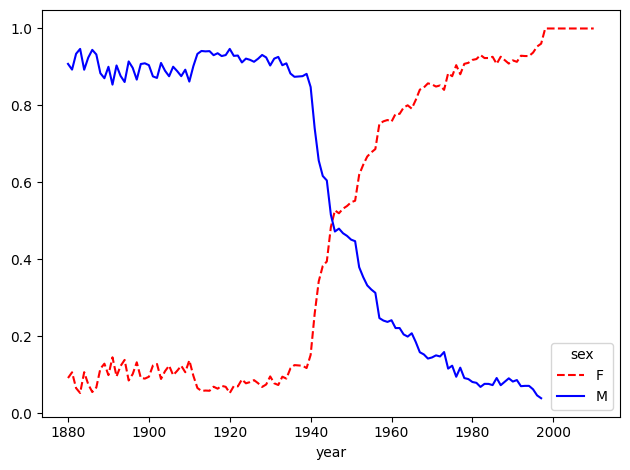

In [53]:
fig = plt.figure()
table.plot(style={"M": "b-", "F": "r--"})
plt.tight_layout() 
plt.savefig("images/tenleslie.pdf", format="pdf")

**Nhận xét:**

Giai đoạn 1880–1940: Hầu hết người mang tên “Lesl” là nam giới. Tỷ lệ nam chiếm gần 100%. Tên này lúc đầu được xem là tên nam truyền thống.

Khoảng 1940–1950: Điểm giao nhau giữa hai đường (M và F) xuất hiện — tức là “Lesl” bắt đầu được đặt cho cả hai giới gần như ngang nhau.

Sau 1950: Tên “Lesl” nhanh chóng chuyển dịch sang phổ biến ở nữ. Tỷ lệ nữ chiếm gần như 100% sau năm 2000, trong khi tỷ lệ nam giảm xuống gần 0.

**Kết luận:**

“Lesl” là ví dụ điển hình của một tên chuyển giới tính theo thời gian — từ nam sang nữ.

Biểu đồ minh họa rõ sự “đảo chiều giới tính” của cái tên này: Từ ~1.0 (nam chiếm gần hết) → ~0.0 (nữ chiếm gần hết).

## 4. USDA Food Database

Nạp dữ liệu và kiểm tra độ dài file

In [1]:
import json
db = json.load(open("datasets/usda_food/database.json"))
len(db)

6636

Kiểm tra các trường dữ liệu trong bản ghi đầu tiên của cơ sở dữ liệu USDA

In [2]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

**Nhận xét:**

id: Mã định danh duy nhất của thực phẩm trong cơ sở dữ liệu.

description: Tên hoặc mô tả của thực phẩm.

tags: Các thẻ mô tả thêm.

manufacturer: Tên nhà sản xuất hoặc thương hiệu.

group: Nhóm thực phẩm.

portions: Thông tin về khẩu phần.

nutrients: Danh sách các chất dinh dưỡng.

Truy cập thông tin chất dinh dưỡng đầu tiên của thực phẩm đầu tiên trong cơ sở dữ liệu USDA

In [3]:
db[0]["nutrients"][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

Chuyển danh sách các chất dinh dưỡng của thực phẩm đầu tiên thành bảng dữ liệu

In [7]:
nutrients = pd.DataFrame(db[0]["nutrients"])
nutrients.head(7)

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy
5,39.28,g,Water,Composition
6,1573.00,kJ,Energy,Energy


Tạo bảng tóm tắt thông tin chung của các thực phẩm trong cơ sở dữ liệu USDA.

In [8]:
info_keys = ["description", "group", "id", "manufacturer"]
info = pd.DataFrame(db, columns=info_keys)
info.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


Kiểm tra thông tin tổng quát về cấu trúc và kiểu dữ liệu của bảng

In [9]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


Thống kê 10 nhóm thực phẩm phổ biến nhất trong cơ sở dữ liệu USDA.

In [10]:
pd.value_counts(info["group"])[:10]

C:\Users\Admin\AppData\Local\Temp\ipykernel_15768\3634668934.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(info["group"])[:10]


group
Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: count, dtype: int64

**Nhận xét:**

Nhóm “Vegetables and Vegetable Products” (Rau củ và các sản phẩm từ rau củ)
→ Có 812 mục, là nhóm đa dạng nhất, chứng tỏ dữ liệu USDA chú trọng mạnh đến nguồn thực phẩm thực vật, phản ánh tầm quan trọng của rau củ trong dinh dưỡng.

Nhóm “Beef Products” (Sản phẩm từ thịt bò) đứng thứ 2 với 618 mục,
→ Thể hiện sự phong phú trong các loại thịt bò và cách chế biến khác nhau (tươi, đông lạnh, chế biến sẵn, v.v.).

Các nhóm “Baked Products” và “Breakfast Cereals”
→ Xuất hiện khá nhiều (400–500 mục), cho thấy cơ sở dữ liệu cũng tập trung vào nguồn thực phẩm chế biến phổ biến trong khẩu phần ăn hiện đại.

Nhóm “Legumes and Legume Products” và “Fast Foods”
→ Có số lượng tương đương (365), phản ánh cả thực phẩm lành mạnh lẫn đồ ăn nhanh đều được ghi nhận đầy đủ trong cơ sở dữ liệu.

Nhóm “Sweets”, “Fruits and Fruit Juices”, “Pork Products”
→ Chiếm tỷ lệ nhỏ hơn, nhưng vẫn thể hiện sự đa dạng nguồn thực phẩm từ nhiều nhóm dinh dưỡng khác nhau.

Tổng hợp toàn bộ dữ liệu chất dinh dưỡng của tất cả thực phẩm trong cơ sở dữ liệu USDA thành một bảng duy nhất.

In [11]:
nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec["nutrients"])
    fnuts["id"] = rec["id"]
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)
display(nutrients)

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


Kiểm tra số lượng bản ghi bị trùng lặp trong bảng

In [12]:
nutrients.duplicated().sum()  # number of duplicates

14179

**Nhận xét:**

Trong bảng nutrients có 14.179 bản ghi bị trùng lặp hoàn toàn



Làm sạch dữ liệu dinh dưỡng và chuẩn hóa tên cột trong bảng thực phẩm

In [13]:
nutrients = nutrients.drop_duplicates()
col_mapping = {"description" : "food",
               "group"       : "fgroup"}
info = info.rename(columns=col_mapping, copy=False)
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   food          6636 non-null   object
 1   fgroup        6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


**Nhận xét:**

Cột manufacturer có giá trị thiếu 1.441 dòng, khoảng 22% dữ liệu bị thiếu.

Chuẩn hóa tên cột trong bảng nutrients để dễ phân biệt và tránh trùng tên khi phân tích dữ liệu.

In [14]:
col_mapping = {"description" : "nutrient",
               "group" : "nutgroup"}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

,value,units,nutrient,nutgroup,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


Gộp hai bảng dữ liệu nutrients và info

In [15]:
ndata = pd.merge(nutrients, info, on="id")
ndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   value         375176 non-null  float64
 1   units         375176 non-null  object 
 2   nutrient      375176 non-null  object 
 3   nutgroup      375176 non-null  object 
 4   id            375176 non-null  int64  
 5   food          375176 non-null  object 
 6   fgroup        375176 non-null  object 
 7   manufacturer  293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 22.9+ MB


Truy cập và xem chi tiết một hàng cụ thể trong bảng ndata sau khi merge dữ liệu

In [16]:
ndata.iloc[30000]

value                                             0.04
units                                                g
nutrient                                       Glycine
nutgroup                                   Amino Acids
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

So sánh giá trị trung vị (median) của hàm lượng kẽm (Zinc, Zn) trong các nhóm thực phẩm (fgroup).

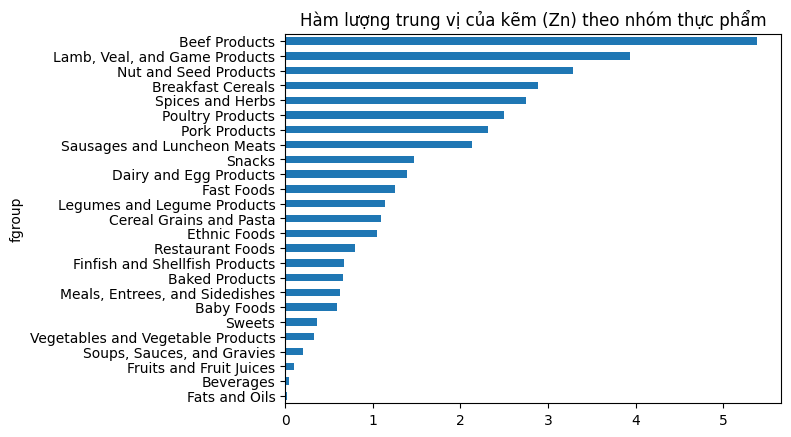

In [18]:
fig = plt.figure()
result = ndata.groupby(["nutrient", "fgroup"])["value"].quantile(0.5)
result["Zinc, Zn"].sort_values().plot(kind="barh", title="Hàm lượng trung vị của kẽm (Zn) theo nhóm thực phẩm")
plt.savefig("images/fgroupzn.pdf")

**Nhận xét:**

Beef Products và Lamb/Veal/Game Products thường có hàm lượng kẽm cao nhất.

Cereals, Legumes, và Nuts/Seeds cũng chứa lượng kẽm đáng kể.

Fruits, Vegetables, và Beverages có hàm lượng kẽm thấp.

→ Biểu đồ giúp nhận ra những nhóm thực phẩm giàu kẽm nhất, hữu ích cho: Việc lập chế độ dinh dưỡng cân bằng và phân tích nguồn cung cấp vi chất trong thực phẩm.

Tìm loại thực phẩm có hàm lượng cao nhất cho từng chất dinh dưỡng trong từng nhóm dinh dưỡng.

In [19]:
by_nutrient = ndata.groupby(["nutgroup", "nutrient"])

def get_maximum(x):
    return x.loc[x.value.idxmax()]

max_foods = by_nutrient.apply(get_maximum)[["value", "food"]]

# make the food a little smaller
max_foods["food"] = max_foods["food"].str[:50]

C:\Users\Admin\AppData\Local\Temp\ipykernel_15768\1825454003.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  max_foods = by_nutrient.apply(get_maximum)[["value", "food"]]


**Nhận xét:**

Tạo bảng tóm tắt thực phẩm giàu nhất về từng chất dinh dưỡng.

Mỗi dòng thể hiện loại thực phẩm đứng đầu cho một chất dinh dưỡng cụ thể.

Ví dụ: Đây là danh sách các thực phẩm chứa hàm lượng cao nhất cho mỗi loại axit amin trong nhóm “Amino Acids” của cơ sở dữ liệu USDA.

In [20]:
max_foods.loc["Amino Acids"]["food"]

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 

**Nhận xét:**

Thực phẩm từ đậu nành (Soy protein isolate):

Xuất hiện nhiều nhất trong danh sách (Aspartic acid, Glutamic acid, Leucine, Phenylalanine, Serine, Threonine, Tyrosine, Valine...).
→ Đậu nành và các sản phẩm cô lập protein đậu nành là nguồn cung cấp axit amin hoàn chỉnh, đặc biệt phù hợp cho người ăn chay hoặc luyện tập thể hình.

Gelatin (Gelatins, dry powder, unsweetened):

Nổi bật ở các axit amin như Alanine, Glycine, Proline.
→ Gelatin giàu collagen, góp phần vào sức khỏe da, tóc, móng và khớp.

Thực phẩm nguồn gốc động vật:

Histidine → Whale (thịt cá voi khô)

Lysine → Seal (thịt hải cẩu khô)

Tryptophan → Sea lion (hải sư)
→ Đây là các dữ liệu thuộc nhóm thực phẩm bản địa (Alaska Native), cho thấy cơ sở dữ liệu USDA có phạm vi khá đa dạng.

Các loại hạt và cá:

Arginine → Hạt mè (sesame flour)

Cystine → Hạt bông (cottonseed flour)

Methionine → Cá tuyết khô (cod, dried and salted)
→ Nguồn cung cấp axit amin chứa lưu huỳnh (Methionine, Cystine) thường đến từ hạt và cá biển.

## 5. 2012 Federal Election Commission Database

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

The US Federal Election Commission (FEC) publishes data on contributions to polit‐
ical campaigns. This includes contributor names, occupation and employer, address,
and contribution amount. The contribution data from the 2012 US presidential
election was available as a single 150-megabyte CSV file P00000001-ALL.csv (see the
book’s data repository), which can be loaded with pandas.read_csv:

In [49]:
fec = pd.read_csv("P00000001-ALL.csv", low_memory=False)
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

Several people asked me to update the dataset from the 2012
election to the 2016 or 2020 elections. Unfortunately, the more
recent datasets provided by the FEC have become larger and more
complex, and I decided that working with them here would be a
distraction from the analysis techniques that I wanted to illustrate.

In [50]:
fec.iloc[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                        50.0
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

You may think of some ways to start slicing and dicing this data to extract informative
statistics about donors and patterns in the campaign contributions. I’ll show you a
number of different analyses that apply the techniques in this book.
You can see that there are no political party affiliations in the data, so this would be
useful to add. You can get a list of all the unique political candidates using unique:

In [51]:
unique_cands = fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [52]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}
fec.cand_nm[123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [53]:
fec["cand_nm"][123456:123461]
fec["cand_nm"][123456:123461].map(parties)
# Add it as a column
fec["party"] = fec["cand_nm"].map(parties)
fec["party"].value_counts()

party
Democrat      593746
Republican    407985
Name: count, dtype: int64

In [54]:
(fec["contb_receipt_amt"] > 0).value_counts()

contb_receipt_amt
True     991475
False     10256
Name: count, dtype: int64

In [55]:
fec = fec[fec["contb_receipt_amt"] > 0]

In [56]:
fec_mrbo = fec[fec["cand_nm"].isin(["Obama, Barack", "Romney, Mitt"])]

### Donation Statistics by Occupation and Employer

Donations by occupation is another oft-studied statistic. For example, attorneys tend
to donate more money to Democrats, while business executives tend to donate more
to Republicans. You have no reason to believe me; you can see for yourself in the
data. First, the total number of donations by occupation can be computed with
value_counts:

In [57]:
fec["contbr_occupation"].value_counts()[:10]

contbr_occupation
RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: count, dtype: int64

You will notice by looking at the occupations that many refer to the same basic job
type, or there are several variants of the same thing. The following code snippet
illustrates a technique for cleaning up a few of them by mapping from one occupation
to another; note the “trick” of using dict.get to allow occupations with no mapping
to “pass through”:

In [58]:
occ_mapping = {
   "INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED",
   "INFORMATION REQUESTED" : "NOT PROVIDED",
   "INFORMATION REQUESTED (BEST EFFORTS)" : "NOT PROVIDED",
   "C.E.O.": "CEO"
}

def get_occ(x):
    # If no mapping provided, return x
    return occ_mapping.get(x, x)

fec["contbr_occupation"] = fec["contbr_occupation"].map(get_occ)

In [59]:
emp_mapping = {
   "INFORMATION REQUESTED PER BEST EFFORTS" : "NOT PROVIDED",
   "INFORMATION REQUESTED" : "NOT PROVIDED",
   "SELF" : "SELF-EMPLOYED",
   "SELF EMPLOYED" : "SELF-EMPLOYED",
}

def get_emp(x):
    # If no mapping provided, return x
    return emp_mapping.get(x, x)

fec["contbr_employer"] = fec["contbr_employer"].map(get_emp)

In [60]:
by_occupation = fec.pivot_table("contb_receipt_amt",
                                index="contbr_occupation",
                                columns="party", aggfunc="sum")
over_2mm = by_occupation[by_occupation.sum(axis="columns") > 2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7477194.43
CEO,2074974.79,4211040.52
CONSULTANT,2459912.71,2544725.45
ENGINEER,951525.55,1818373.70
EXECUTIVE,1355161.05,4138850.09
HOMEMAKER,4248875.80,13634275.78
INVESTOR,884133.00,2431768.92
LAWYER,3160478.87,391224.32
MANAGER,762883.22,1444532.37


In [61]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Axes: ylabel='contbr_occupation'>

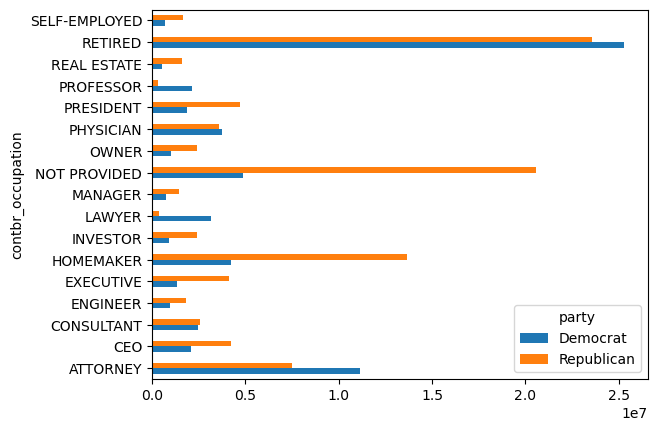

In [62]:
over_2mm.plot(kind="barh")

In [63]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)

grouped = fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

C:\Users\84909\AppData\Local\Temp\ipykernel_3340\3136066192.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped.apply(get_top_amounts, 'contbr_occupation', n=7)


cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
               LAWYER                                     3160478.87
               CONSULTANT                                 2459912.71
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                                   5364718.82
               PRESIDENT                                  2491244.89
               EXECUTIVE                                  2300947.03
               C.E.O.                            

In [64]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

C:\Users\84909\AppData\Local\Temp\ipykernel_3340\1241302789.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped.apply(get_top_amounts, 'contbr_employer', n=10)


cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22694358.85
               SELF-EMPLOYED                             17080985.96
               NOT EMPLOYED                               8586308.70
               INFORMATION REQUESTED                      5053480.37
               HOMEMAKER                                  2605408.54
               SELF                                       1076531.20
               SELF EMPLOYED                               469290.00
               STUDENT                                     318831.45
               VOLUNTEER                                   257104.00
               MICROSOFT                                   215585.36
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    12059527.24
               RETIRED                                   11506225.71
               HOMEMAKER                                  8147196.22
               SELF-EMPLOYED                     

### Bucketing Donation Amounts

In [65]:
bins = np.array([0, 1, 10, 100, 1_000, 10_000, 100_000, 1_000_000, 10_000_000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64, right]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [66]:
grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(0)

C:\Users\84909\AppData\Local\Temp\ipykernel_3340\2972708327.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = fec_mrbo.groupby(['cand_nm', labels])


cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


In [67]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798531.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,0.00
"(1000000, 10000000]",7148839.76,0.00


In [68]:
bucket_sums.sum(axis=1)

contb_receipt_amt
(0, 1]                 3.952400e+02
(1, 10]                3.670873e+05
(10, 100]              2.227677e+07
(100, 1000]            7.716191e+07
(1000, 10000]          1.156959e+08
(10000, 100000]        7.180000e+04
(100000, 1000000]      1.490683e+06
(1000000, 10000000]    7.148840e+06
dtype: float64

In [69]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,0.000000
"(1000000, 10000000]",1.000000,0.000000


<Axes: ylabel='contb_receipt_amt'>

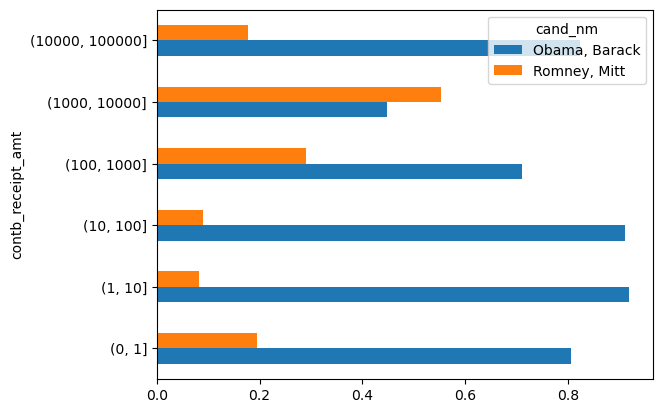

In [70]:
normed_sums[:-2].plot(kind='barh')

I excluded the two largest bins, as these are not donations by individuals.
This analysis can be refined and improved in many ways. For example, you could
aggregate donations by donor name and zip code to adjust for donors who gave many
small amounts versus one or more large donations. I encourage you to explore the
dataset yourself.

### Donation Statistics by State

In [71]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100_000]
totals.head(10)

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


In [72]:
percent = totals.div(totals.sum(1), axis=0)
percent.head(10)

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224
